# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract

In [2]:
###  This line reads in the csv file and displays the first 5 indicies of the dataframe 

df = pd.read_csv("MOCO_TrafficViolations_2015.csv")
df.head(5)

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,86b9922c-795c-4e59-a8e9-3862f885dcc2,01/01/2015,09:53:00,MCP,"2nd District, Bethesda",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,OLD GEORGETOWN RD/ NICHOLSON LA,39.044890,-77.119977,No,...,16-303(c),Transportation Article,False,WHITE,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.04489, -77.1199766666667)"
1,4af3e4c9-f25a-4555-8fa5-0c82d60199e9,01/01/2015,08:13:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO STOP AT STOP SIGN LINE,GREENTREE RD @ BURDETTE RD,39.008677,-77.140148,No,...,21-707(a),Transportation Article,False,WHITE,M,WASHINGTON,DC,DC,A - Marked Patrol,"(39.0086766666667, -77.1401483333333)"
2,a7ae2d2a-4ac7-4591-a534-f73e42c50c24,01/01/2015,05:49:00,MCP,"3rd District, Silver Spring",FAILURE TO DRIVE VEHICLE ON RIGHT HALF OF ROAD...,NORWOOD RD/NEW HAMPSHIRE AVE,39.108695,-77.005002,No,...,21-301(a),Transportation Article,False,ASIAN,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.108695, -77.0050016666667)"
3,a7ae2d2a-4ac7-4591-a534-f73e42c50c24,01/01/2015,05:49:00,MCP,"3rd District, Silver Spring",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,NORWOOD RD/NEW HAMPSHIRE AVE,39.108695,-77.005002,No,...,13-409(b),Transportation Article,False,ASIAN,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.108695, -77.0050016666667)"
4,d0245fc5-3b61-4b04-b218-e8d0c19b481b,01/01/2015,05:55:00,MCP,"2nd District, Bethesda",EXCEEDING MAXIMUM SPEED: 75 MPH IN A POSTED 55...,SB I270 @ MIDDLEBROOK RD,39.174223,-77.246268,No,...,21-801.1,Transportation Article,False,BLACK,M,BRUNSWICK,MD,MD,A - Marked Patrol,"(39.1742233333333, -77.2462683333333)"


# Transform

In [3]:
###  This line removes any of the columns of the dataframe that are unnecessary for this analysis

filtered = df[["Color","Make", "Gender", "Race", "Violation Type", "Time Of Stop"]]
filtered.head(10)

,Color,Make,Gender,Race,Violation Type,Time Of Stop
0,WHITE,PONTIAC,F,WHITE,Citation,09:53:00
1,SILVER,FORD,M,WHITE,Citation,08:13:00
2,"BLUE, DARK",LEXUS,F,ASIAN,Citation,05:49:00
3,"BLUE, DARK",LEXUS,F,ASIAN,Citation,05:49:00
4,BLACK,TOYT,M,BLACK,Citation,05:55:00
5,GRAY,TOYT,M,WHITE,Citation,07:35:00
6,BLACK,TOYOTA,F,HISPANIC,Citation,19:52:00
7,BLACK,TOYOTA,F,HISPANIC,Citation,19:52:00
8,BLACK,TOYOTA,F,HISPANIC,Citation,19:52:00
9,BLACK,TOYOTA,F,HISPANIC,Citation,19:52:00


In [4]:
###  This line checks how many null/NaN values the dataframe contains

filtered.isnull().sum()

Color             3167
Make                 3
Gender               0
Race                 0
Violation Type       0
Time Of Stop         0
dtype: int64

In [5]:
### This removes all the indicies containing NaN / Null values, then confirms that they've been removed

filtered = filtered.dropna()
filtered.isnull().sum()

Color             0
Make              0
Gender            0
Race              0
Violation Type    0
Time Of Stop      0
dtype: int64

In [6]:
### Checking to see the number of vehicles for each car color

filtered["Color"].value_counts()

BLACK          47629
SILVER         44029
WHITE          35097
GRAY           25469
RED            18500
BLUE           17116
GREEN           8594
GOLD            7335
BLUE, DARK      5176
TAN             5174
MAROON          3730
BLUE, LIGHT     3151
BEIGE           2970
GREEN, DK       2762
GREEN, LGT      1311
BROWN           1027
YELLOW           873
ORANGE           716
BRONZE           538
PURPLE           490
MULTICOLOR       206
CREAM            154
COPPER           100
PINK              39
CAMOUFLAGE         8
CHROME             8
Name: Color, dtype: int64

In [7]:
### This section combines some similar car colors into the same category for brevity and clarity.  For example, dark green, light green, and green are all combined into the GREEN category

filtered['Color'] = filtered['Color'].replace(['GREEN, DK','GREEN, LGT'],'GREEN')
filtered['Color'] = filtered['Color'].replace(['BLUE, DARK','BLUE, LIGHT'],'BLUE')
filtered['Color'] = filtered['Color'].replace(['TAN'],'BEIGE')
filtered['Color'] = filtered['Color'].replace(['MAROON'],'RED')
filtered['Color'] = filtered['Color'].replace(['CREAM'],'WHITE')
filtered['Color'] = filtered['Color'].replace(['COPPER', 'BRONZE'],'BROWN')


###  This section drops the indicies that contain car colors with negligble vehicle amounts

index_names = filtered[(filtered['Color'] == "MULTICOLOR") | (filtered['Color'] == "CHROME") | (filtered['Color'] == "CAMOUFLAGE")].index
filtered.drop(index_names, inplace = True)

filtered["Color"].value_counts()

BLACK     47629
SILVER    44029
WHITE     35251
GRAY      25469
BLUE      25443
RED       22230
GREEN     12667
BEIGE      8144
GOLD       7335
BROWN      1665
YELLOW      873
ORANGE      716
PURPLE      490
PINK         39
Name: Color, dtype: int64

In [8]:
### This section filters out any indicies containing car manufacturers that have less than 1000 vehicles in the data set, again for brevity and clarity

new_ind = []
for item in filtered["Make"]:
    temp4 = item[0:3]
    new_ind.append(temp4)
filtered["Make"] = new_ind
intemp = filtered["Make"].value_counts()
cleaned = intemp[intemp > 1000]
cleaned

TOY    41299
HON    34054
FOR    21772
NIS    18433
CHE    17826
DOD     7938
MER     7729
HYU     7644
ACU     7320
VOL     6568
BMW     6365
JEE     5195
LEX     4952
MAZ     4729
CHR     3941
SUB     3273
KIA     3252
GMC     2993
MIT     2982
INF     2717
AUD     2175
CAD     2101
BUI     1794
PON     1459
LIN     1350
SCI     1115
SAT     1051
VW      1002
Name: Make, dtype: int64

In [9]:
cleaner = list(cleaned.index)
cleaner

['TOY',
 'HON',
 'FOR',
 'NIS',
 'CHE',
 'DOD',
 'MER',
 'HYU',
 'ACU',
 'VOL',
 'BMW',
 'JEE',
 'LEX',
 'MAZ',
 'CHR',
 'SUB',
 'KIA',
 'GMC',
 'MIT',
 'INF',
 'AUD',
 'CAD',
 'BUI',
 'PON',
 'LIN',
 'SCI',
 'SAT',
 'VW']

In [10]:
final = filtered[filtered["Make"].isin(cleaner)]

In [11]:
### This section creates two new columns.  Ticketed Rate assigns a 1 to only indicies where the vehicle recieved a citation, otherwise a 0.  Pullover Rate assigns a 1 to all violations.


templ = []
for item in final["Violation Type"]:
    if item == "Citation":
        templ.append(1)
    else:
        templ.append(0)
final["Ticketed Rate"] = templ

templ2 = []
for item in final["Violation Type"]:
    if item == "Citation":
        templ2.append(1)
    else:
        templ2.append(1)
final["Pullover Rate"] = templ2

final

C:\Users\akim\Anaconda3\envs\dst_3.6\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\akim\Anaconda3\envs\dst_3.6\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Color,Make,Gender,Race,Violation Type,Time Of Stop,Ticketed Rate,Pullover Rate
0,WHITE,PON,F,WHITE,Citation,09:53:00,1,1
1,SILVER,FOR,M,WHITE,Citation,08:13:00,1,1
2,BLUE,LEX,F,ASIAN,Citation,05:49:00,1,1
3,BLUE,LEX,F,ASIAN,Citation,05:49:00,1,1
4,BLACK,TOY,M,BLACK,Citation,05:55:00,1,1
...,...,...,...,...,...,...,...,...
235365,BLACK,CHE,M,HISPANIC,ESERO,08:45:00,0,1
235366,BLUE,SUB,M,WHITE,ESERO,20:39:00,0,1
235367,BLUE,SUB,M,WHITE,ESERO,20:39:00,0,1
235368,BLUE,SUB,M,WHITE,ESERO,20:39:00,0,1


# Correlation Between Color and Make and Ticketed Rate

In [12]:
### This section creates a pivot table using Color and Make and Ticketed Rate to be used in the Heat Map below

pvt1 = pd.pivot_table(data=final, index='Color', columns='Make',values='Ticketed Rate')
#pvt1 = pvt1.fillna(0)
pvt1


Make,ACU,AUD,BMW,BUI,CAD,CHE,CHR,DOD,FOR,GMC,...,MER,MIT,NIS,PON,SAT,SCI,SUB,TOY,VOL,VW
Color,,,,,,,,,,,,,,,,,,,,,
BEIGE,0.496350,0.516129,0.449438,0.455830,0.378641,0.481638,0.474074,0.561404,0.515810,0.469799,...,0.534653,0.490909,0.410940,0.619048,0.588235,0.000000,0.383562,0.406169,0.445255,0.200000
BLACK,0.442971,0.462033,0.467311,0.427586,0.502793,0.479460,0.419185,0.494063,0.478305,0.463746,...,0.454896,0.475483,0.477471,0.541063,0.546392,0.582996,0.354212,0.428383,0.404692,0.362069
BLUE,0.398744,0.527523,0.465616,0.532995,0.532895,0.462695,0.491172,0.455122,0.474639,0.528037,...,0.464126,0.451852,0.452677,0.428571,0.457627,0.382199,0.363934,0.386164,0.485747,0.482456
BROWN,0.236842,0.250000,0.400000,0.589744,0.600000,0.434109,0.153846,0.529412,0.503704,0.459459,...,0.333333,0.400000,0.450617,0.823529,0.000000,0.400000,0.444444,0.389908,0.465517,0.333333
GOLD,0.458824,0.652174,0.367647,0.541063,0.425287,0.462929,0.370787,0.333333,0.513580,0.457831,...,0.488215,0.080000,0.539941,0.586667,0.176471,NaN,0.152174,0.427571,0.409639,0.066667
GRAY,0.376404,0.434028,0.517760,0.531034,0.382353,0.494382,0.486405,0.484416,0.467799,0.435374,...,0.426415,0.388393,0.495187,0.487805,0.495238,0.414815,0.317221,0.402168,0.446985,0.539474
GREEN,0.433692,0.400000,0.472103,0.401961,0.492308,0.467128,0.375000,0.451247,0.510558,0.627586,...,0.435252,0.457944,0.426168,0.386364,0.327434,0.500000,0.369863,0.435501,0.511561,0.425000
ORANGE,0.000000,0.333333,0.470588,NaN,NaN,0.549020,0.200000,0.569767,0.454545,0.000000,...,NaN,0.619048,0.296296,1.000000,0.666667,0.312500,0.285714,0.428571,0.333333,NaN
PINK,0.000000,NaN,NaN,NaN,0.333333,0.428571,NaN,NaN,0.833333,NaN,...,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN


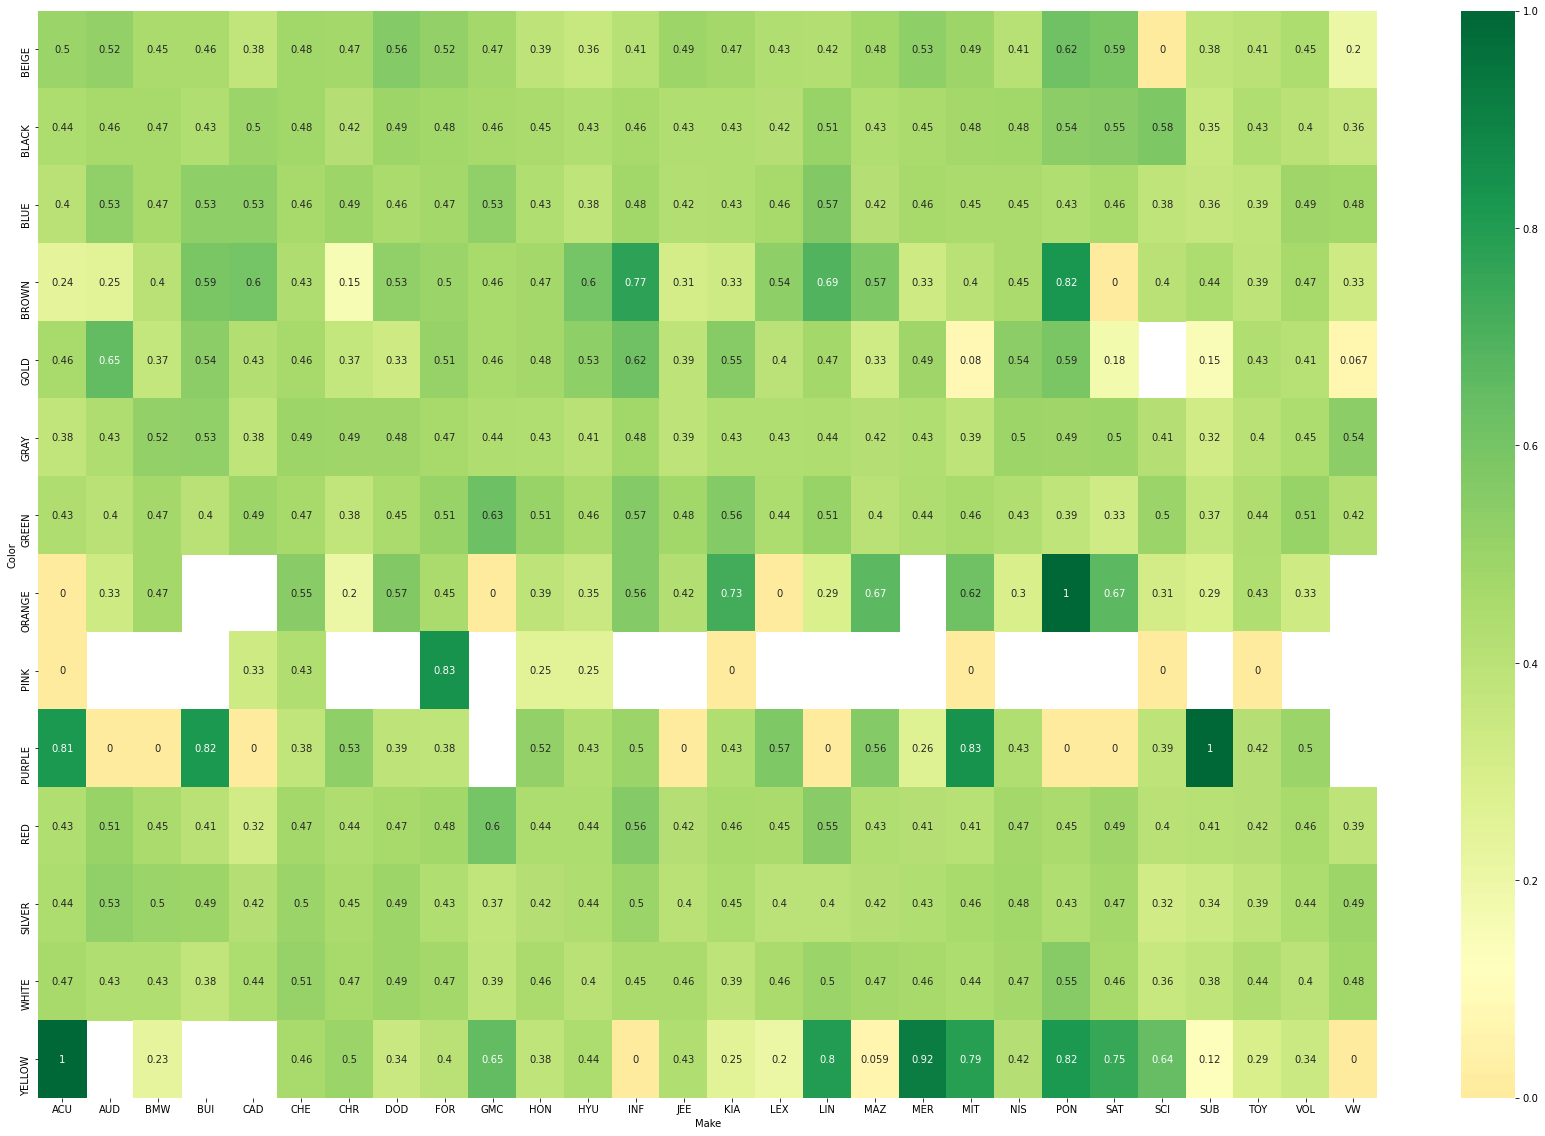

In [13]:
### This is the heatmap of pivot table

plt.subplots(figsize=(30,20))
sns.heatmap(pvt1, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# Which Color Gets Pulled Over The Most?

In [14]:
color_bar = final.groupby('Color')['Pullover Rate'].sum().sort_values(ascending = False)
colors = list(color_bar.index)
colors

['BLACK',
 'SILVER',
 'WHITE',
 'GRAY',
 'BLUE',
 'RED',
 'GREEN',
 'BEIGE',
 'GOLD',
 'BROWN',
 'YELLOW',
 'ORANGE',
 'PURPLE',
 'PINK']

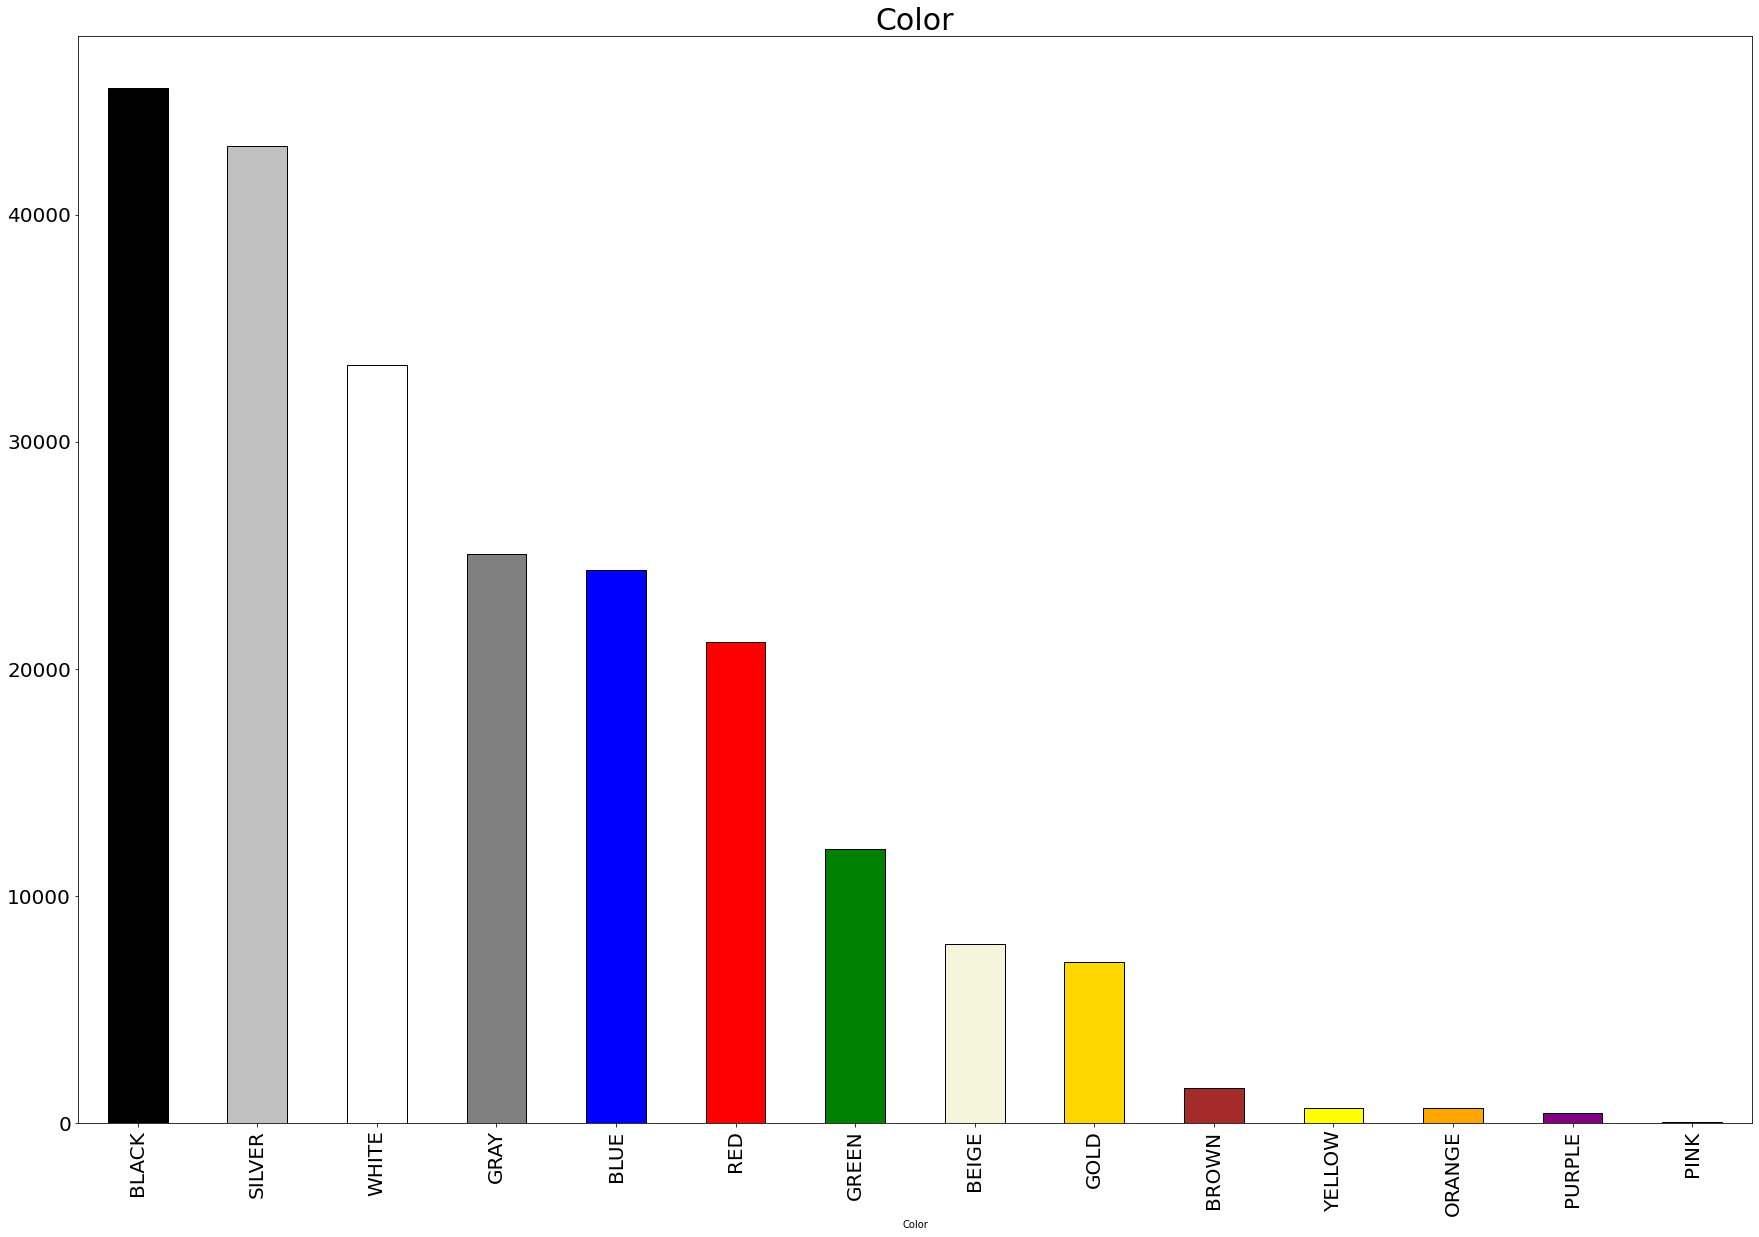

In [15]:
plt.subplots(figsize=(30,20))
color_bar.plot.bar(color=colors, edgecolor = "Black", fontsize = 20)
plt.title("Color", fontsize = 30)
plt.show()

# Which Make Gets Pulled Over The Most?

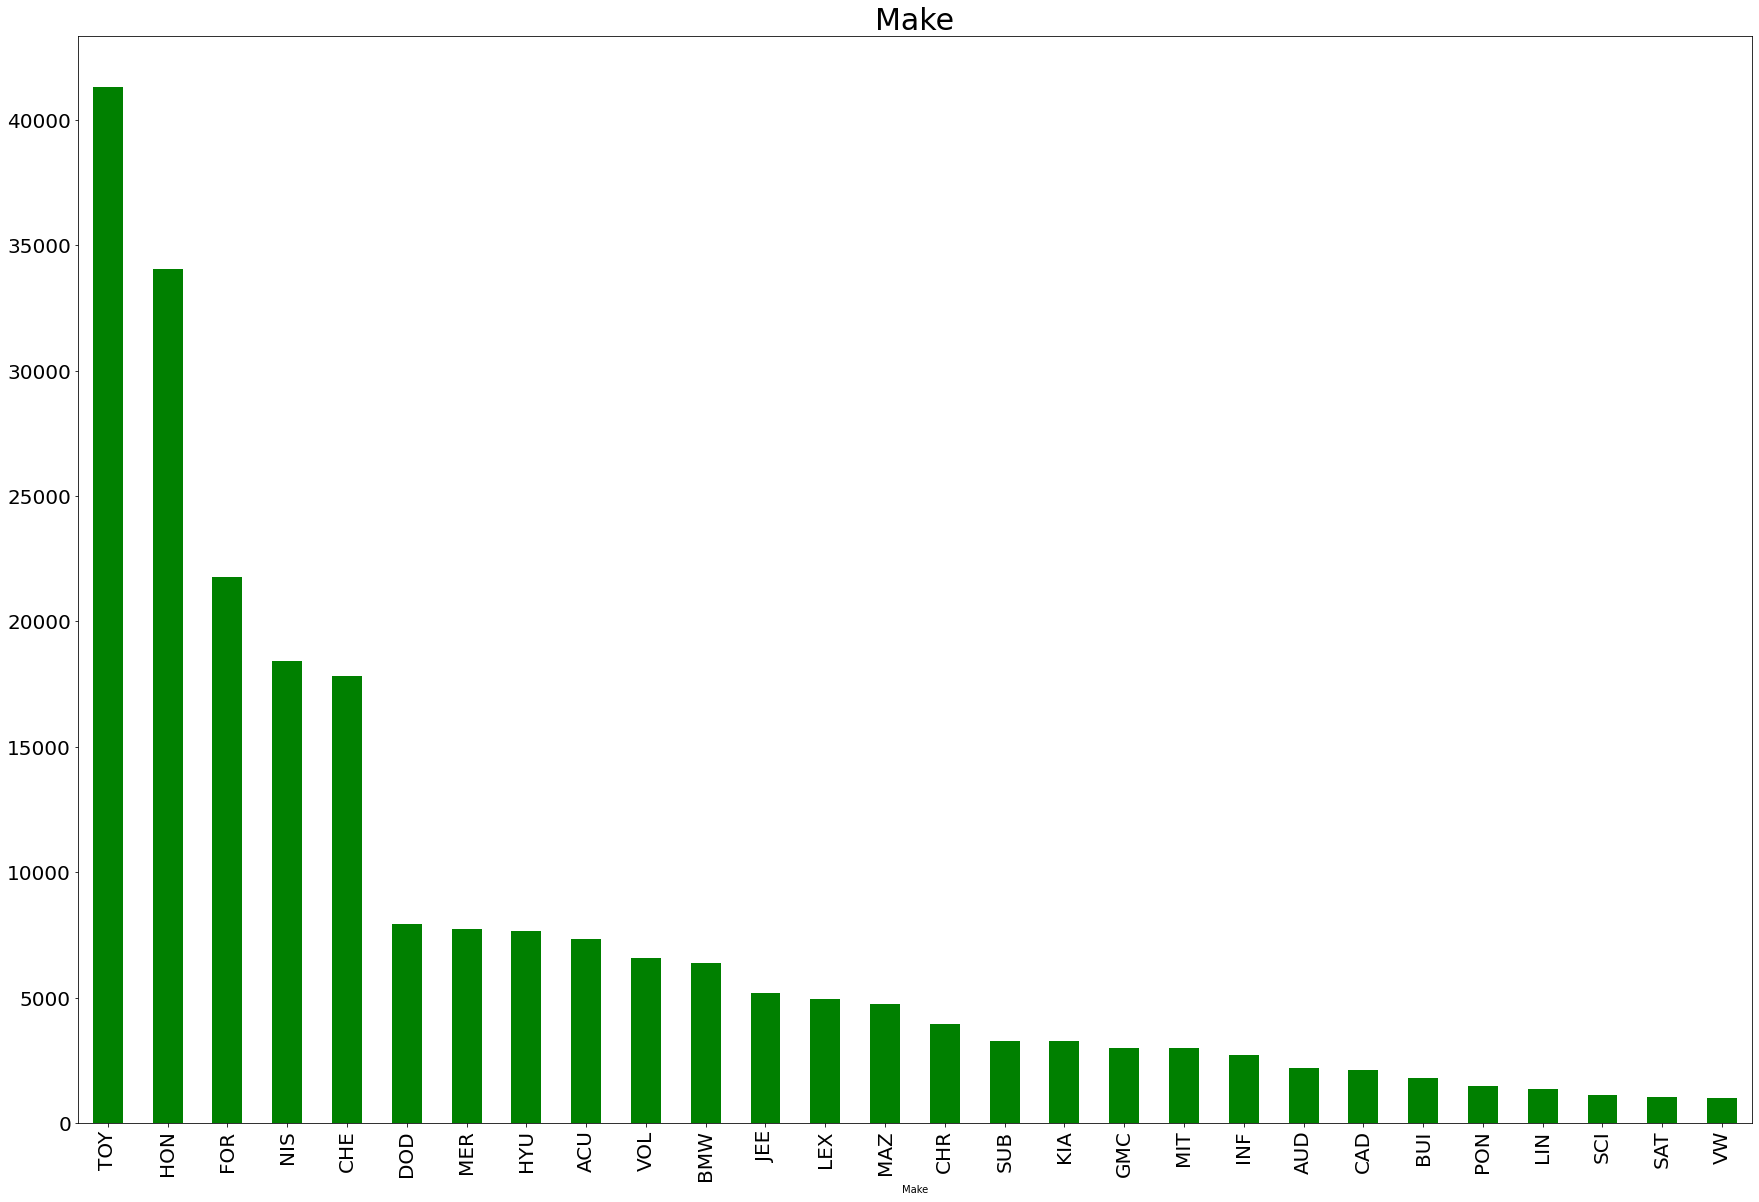

In [16]:
plt.subplots(figsize=(30,20))
make_bar = final.groupby('Make')['Pullover Rate'].sum().sort_values(ascending = False)
make_bar.plot.bar(color = "Green", fontsize = 20)
plt.title("Make", fontsize = 30)
plt.show()

# Which Gender Gets Pulled Over The Most?

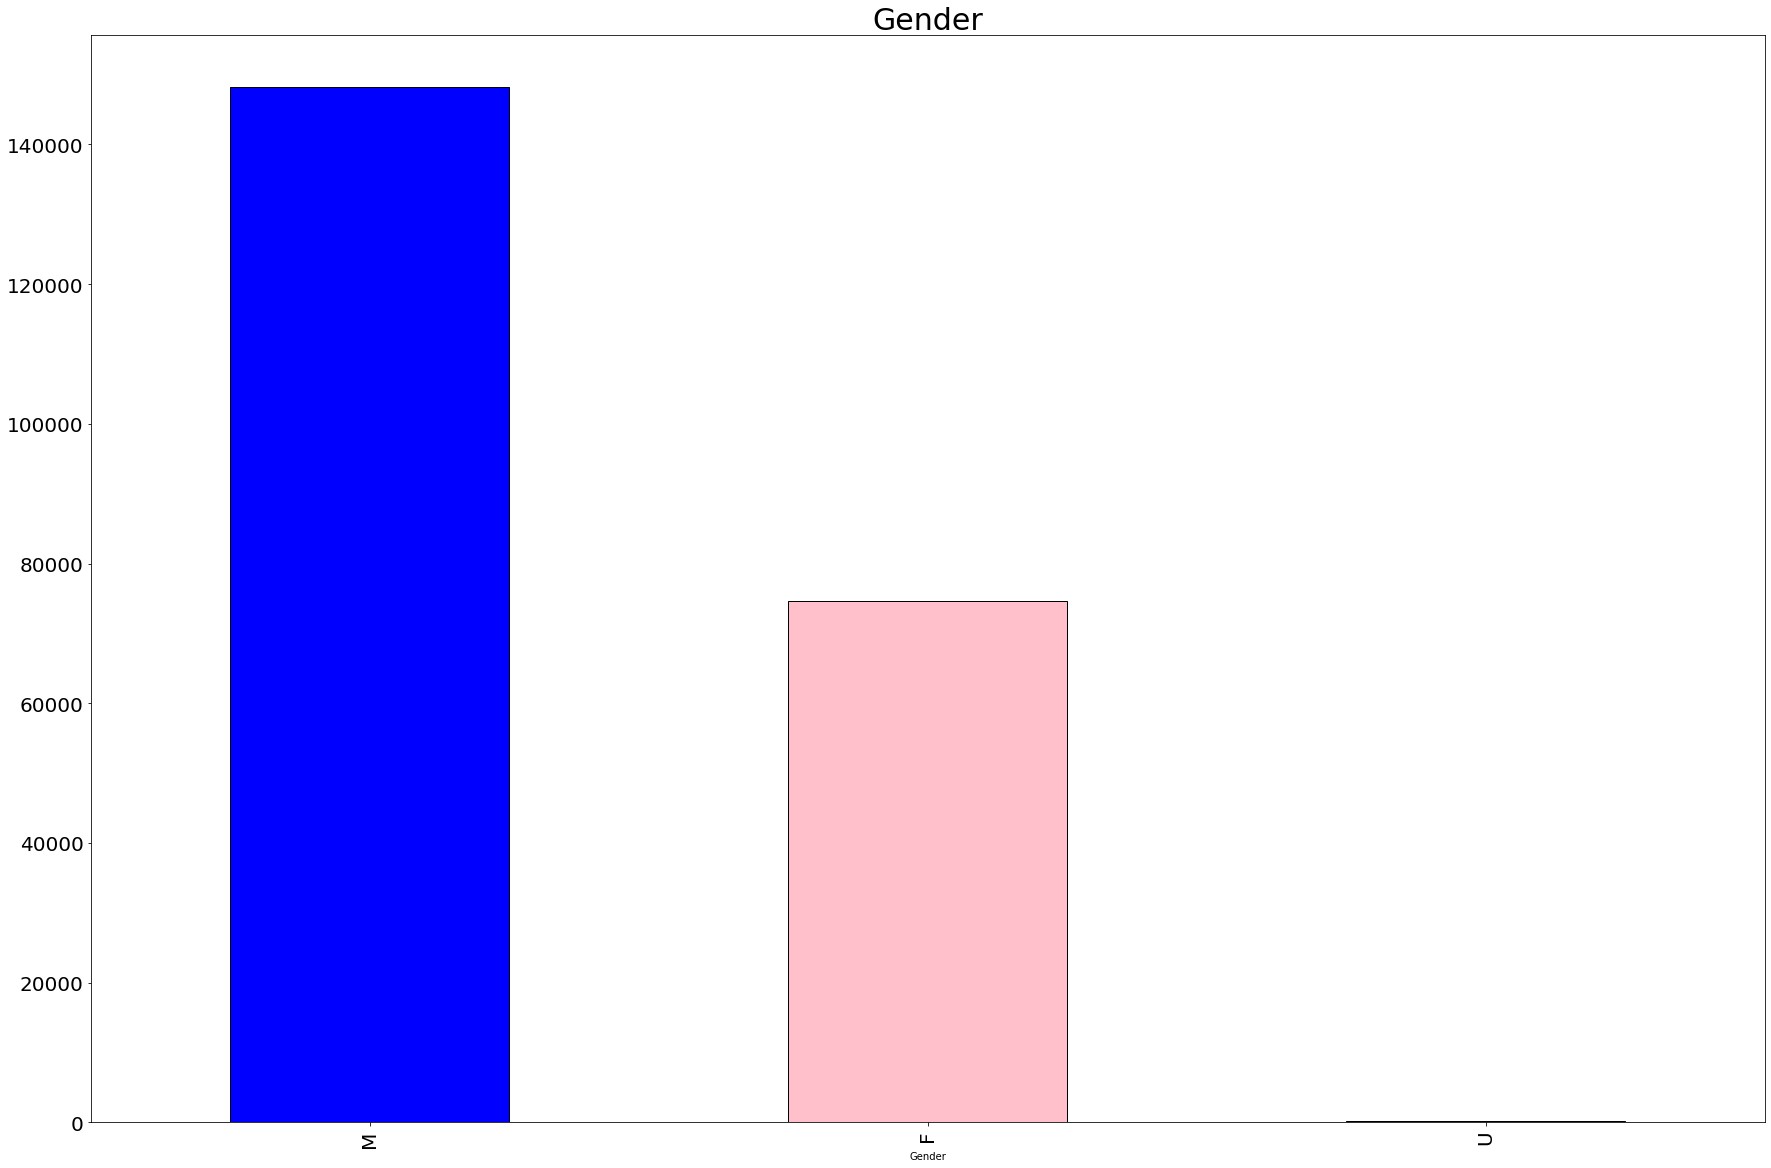

In [17]:
plt.subplots(figsize=(30,20))
make_bar = final.groupby('Gender')['Pullover Rate'].sum().sort_values(ascending = False)
make_bar.plot.bar(color = ["Blue", "Pink", "Gray"], edgecolor = "Black", fontsize = 20)
plt.title("Gender", fontsize = 30)
plt.show()

# Which Race Gets Pulled Over The Most?

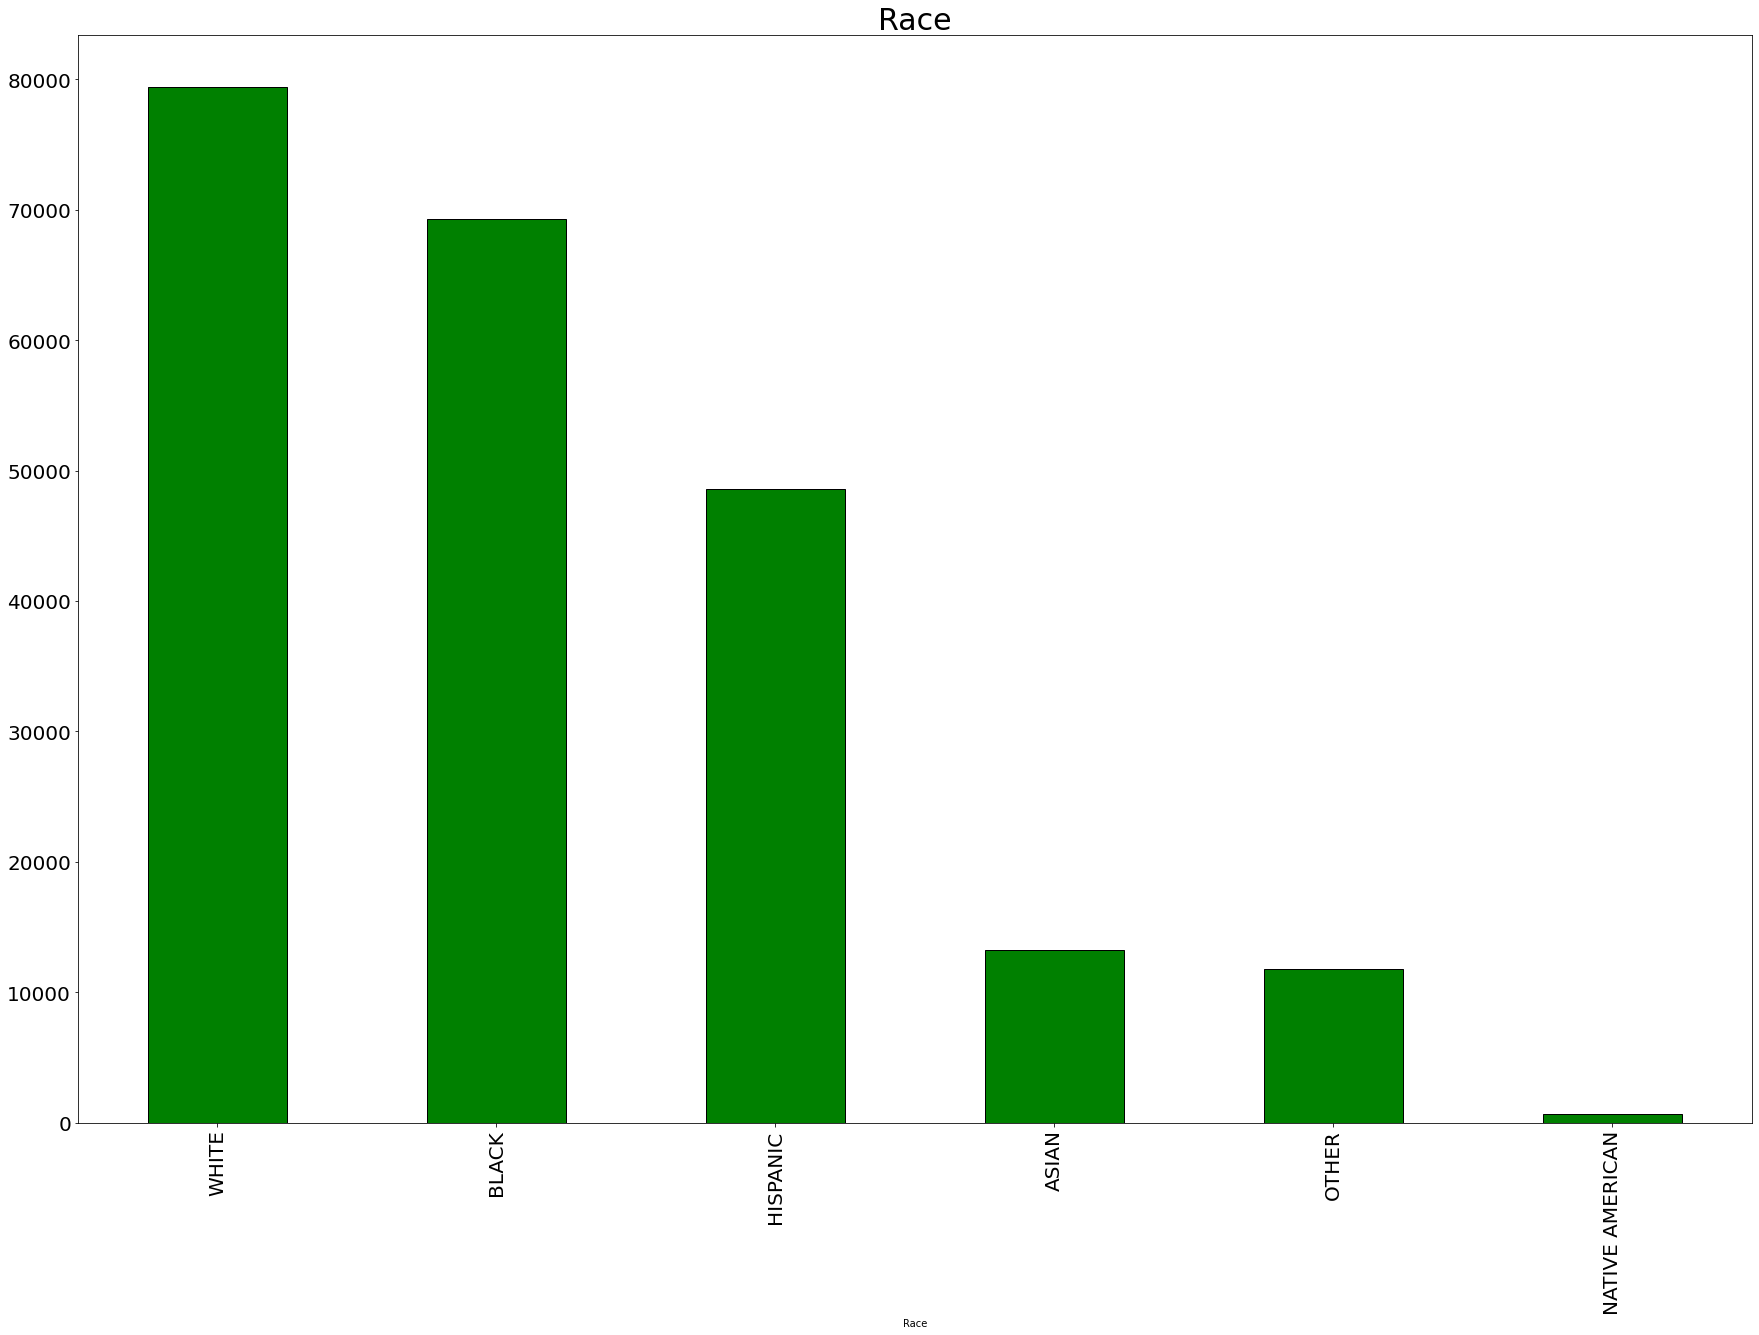

In [18]:
plt.subplots(figsize=(30,20))
make_bar = final.groupby('Race')['Pullover Rate'].sum().sort_values(ascending = False)
make_bar.plot.bar(color = "Green", edgecolor = "Black", fontsize = 20)
#make_bar.plot.bar(color = ["Red", "Orange", "Yellow", "Green", "Blue", "Purple"], edgecolor = "Black", fontsize = 20)
plt.title("Race", fontsize = 30)
plt.show()

# How Does Time of Day Affect Violation Rate?

In [19]:
### This section converts the Time Of Stop column in the dataframe into the standardized datetime format from Python

import datetime

templ = []
for item in final["Time Of Stop"]:
    templ.append(datetime.datetime.strptime(item, '%H:%M:%S'))
final["Time Of Stop"] = templ
final

C:\Users\akim\Anaconda3\envs\dst_3.6\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Color,Make,Gender,Race,Violation Type,Time Of Stop,Ticketed Rate,Pullover Rate
0,WHITE,PON,F,WHITE,Citation,1900-01-01 09:53:00,1,1
1,SILVER,FOR,M,WHITE,Citation,1900-01-01 08:13:00,1,1
2,BLUE,LEX,F,ASIAN,Citation,1900-01-01 05:49:00,1,1
3,BLUE,LEX,F,ASIAN,Citation,1900-01-01 05:49:00,1,1
4,BLACK,TOY,M,BLACK,Citation,1900-01-01 05:55:00,1,1
...,...,...,...,...,...,...,...,...
235365,BLACK,CHE,M,HISPANIC,ESERO,1900-01-01 08:45:00,0,1
235366,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1
235367,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1
235368,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1


In [20]:
###  This section assigns arbitrary boundries to times of day using labels such as Morning, Afternoon, Evening, and Night, then uses one-hot encoding to assign a numerical value to those columns

morning_begin = datetime.datetime.strptime("05:00:00", '%H:%M:%S')
afternoon_begin = datetime.datetime.strptime("12:00:00", '%H:%M:%S')
evening_begin = datetime.datetime.strptime("17:00:00", '%H:%M:%S')
night_begin = datetime.datetime.strptime("21:00:00", '%H:%M:%S')

final["Morning"] = (final["Time Of Stop"] >= morning_begin) & (final["Time Of Stop"] < afternoon_begin)
final["Morning"] = final["Morning"].astype(int)

final["Afternoon"] = (final["Time Of Stop"] >= afternoon_begin) & (final["Time Of Stop"] < evening_begin)
final["Afternoon"] = final["Afternoon"].astype(int)

final["Evening"] = (final["Time Of Stop"] >= evening_begin) & (final["Time Of Stop"] < night_begin)
final["Evening"] = final["Evening"].astype(int)

final["Night"] = (final["Time Of Stop"] >= night_begin) | (final["Time Of Stop"] < morning_begin)
final["Night"] = final["Night"].astype(int)

final

C:\Users\akim\Anaconda3\envs\dst_3.6\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\akim\Anaconda3\envs\dst_3.6\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\akim\Anaconda3\envs\dst_3.6\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Color,Make,Gender,Race,Violation Type,Time Of Stop,Ticketed Rate,Pullover Rate,Morning,Afternoon,Evening,Night
0,WHITE,PON,F,WHITE,Citation,1900-01-01 09:53:00,1,1,1,0,0,0
1,SILVER,FOR,M,WHITE,Citation,1900-01-01 08:13:00,1,1,1,0,0,0
2,BLUE,LEX,F,ASIAN,Citation,1900-01-01 05:49:00,1,1,1,0,0,0
3,BLUE,LEX,F,ASIAN,Citation,1900-01-01 05:49:00,1,1,1,0,0,0
4,BLACK,TOY,M,BLACK,Citation,1900-01-01 05:55:00,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235365,BLACK,CHE,M,HISPANIC,ESERO,1900-01-01 08:45:00,0,1,1,0,0,0
235366,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1,0,0,1,0
235367,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1,0,0,1,0
235368,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1,0,0,1,0


In [21]:
###  This section may be a roundabout way of doing this, but this section creates a new column called general time that assigns a label to each index based on the corresponding timeslot
### (Morning, Evening, Night, etc.)

templist = []
for item in final.index:
    if final["Morning"][item] == 1:
        templist.append("Morning")
    elif final["Afternoon"][item] == 1:
        templist.append("Afternoon")
    if final["Evening"][item] == 1:
        templist.append("Evening")
    if final["Night"][item] == 1:
        templist.append("Night")
final["General Time"] = templist
final

C:\Users\akim\Anaconda3\envs\dst_3.6\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Color,Make,Gender,Race,Violation Type,Time Of Stop,Ticketed Rate,Pullover Rate,Morning,Afternoon,Evening,Night,General Time
0,WHITE,PON,F,WHITE,Citation,1900-01-01 09:53:00,1,1,1,0,0,0,Morning
1,SILVER,FOR,M,WHITE,Citation,1900-01-01 08:13:00,1,1,1,0,0,0,Morning
2,BLUE,LEX,F,ASIAN,Citation,1900-01-01 05:49:00,1,1,1,0,0,0,Morning
3,BLUE,LEX,F,ASIAN,Citation,1900-01-01 05:49:00,1,1,1,0,0,0,Morning
4,BLACK,TOY,M,BLACK,Citation,1900-01-01 05:55:00,1,1,1,0,0,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235365,BLACK,CHE,M,HISPANIC,ESERO,1900-01-01 08:45:00,0,1,1,0,0,0,Morning
235366,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1,0,0,1,0,Evening
235367,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1,0,0,1,0,Evening
235368,BLUE,SUB,M,WHITE,ESERO,1900-01-01 20:39:00,0,1,0,0,1,0,Evening


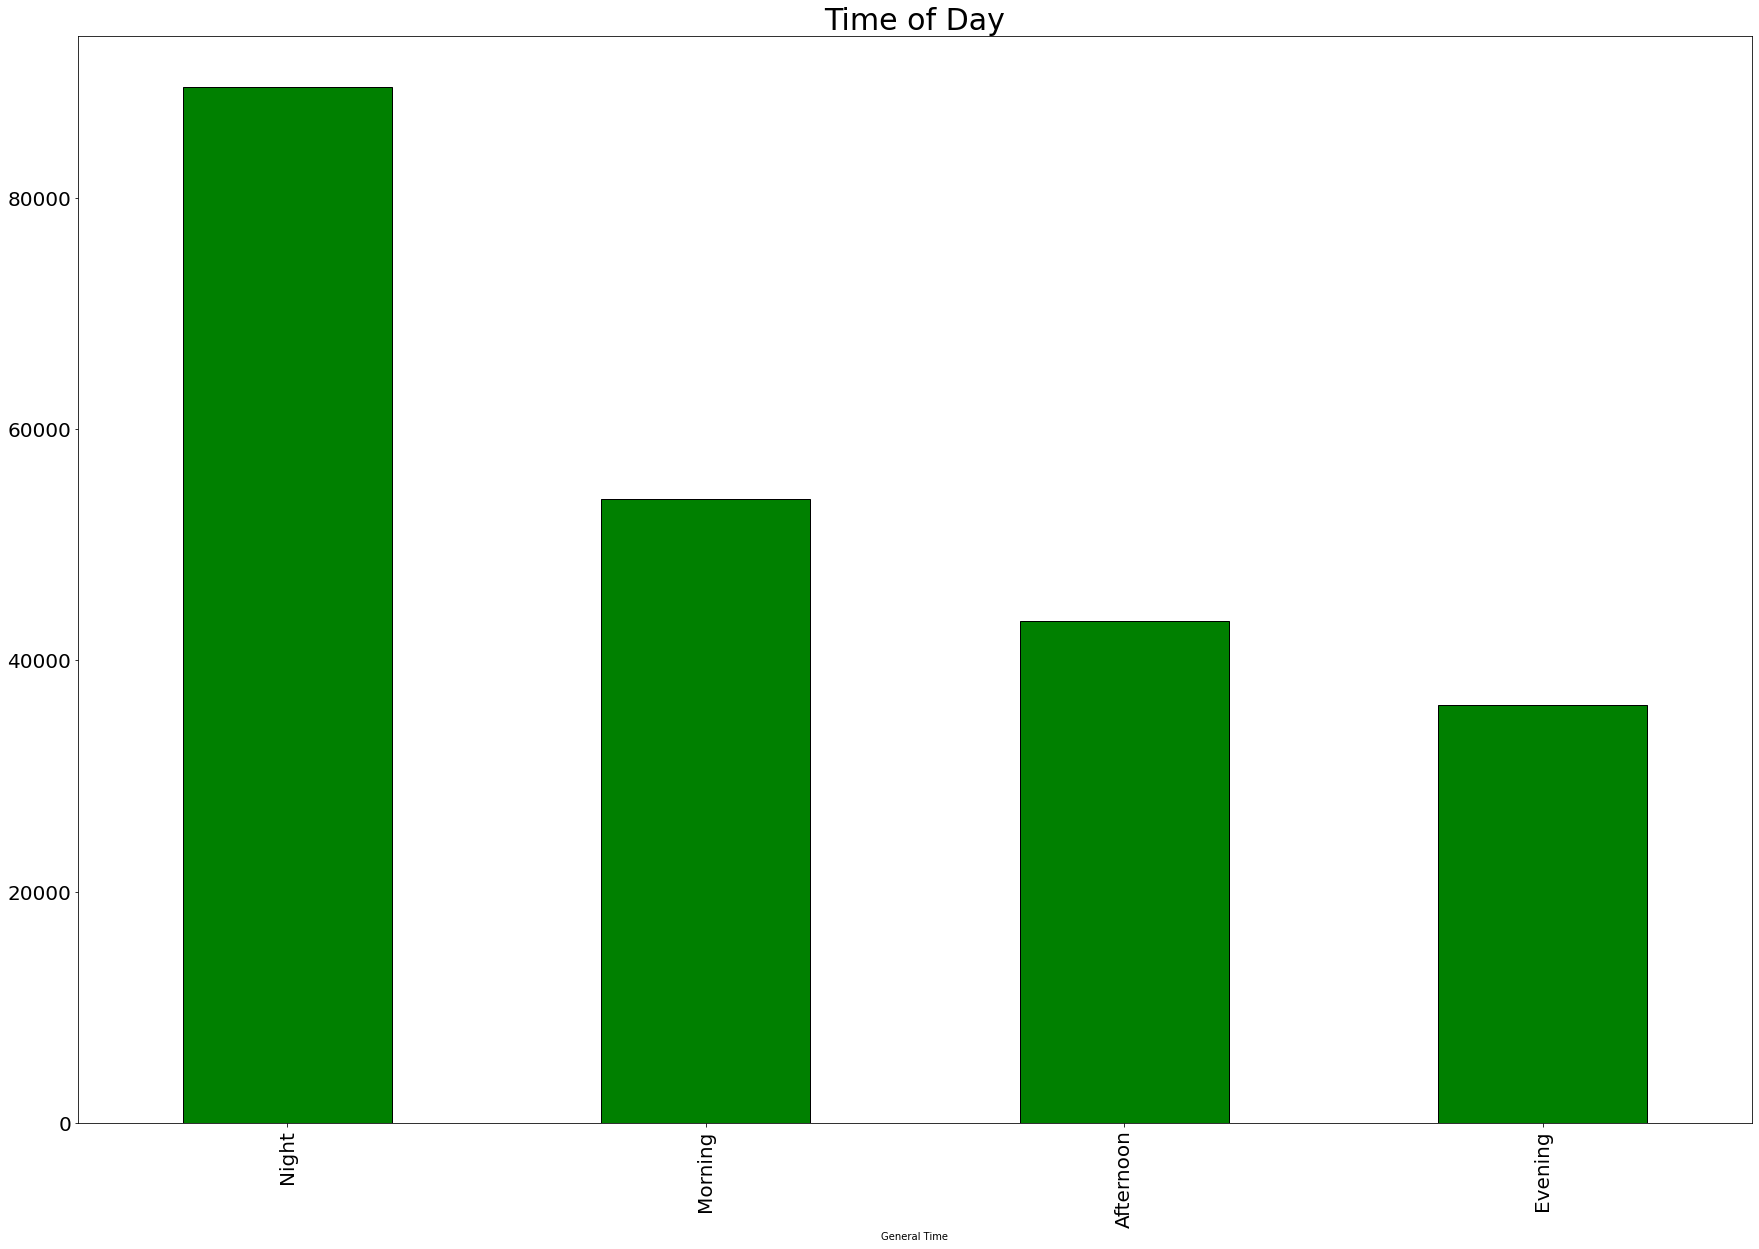

In [22]:
plt.subplots(figsize=(30,20))
make_bar = final.groupby('General Time')['Pullover Rate'].sum().sort_values(ascending = False)
make_bar.plot.bar(color = "Green", edgecolor = "Black", fontsize = 20)
#make_bar.plot.bar(color = ["Red", "Orange", "Yellow", "Green", "Blue", "Purple"], edgecolor = "Black", fontsize = 20)
plt.title("Time of Day", fontsize = 30)
plt.show()

# Load

In [23]:
final.to_csv("ETL_akim.csv")